In [1]:
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_path = "../irmas_novoice__mfcc.json"
classes = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio"]
with open(data_path, "r") as fp:
        data = json.load(fp)

 # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])
# X = np.array([x.T for x in X])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2])

(4741, 130, 13)
(4741,)


In [4]:
from keras.src.callbacks import ModelCheckpoint
from models.genre_first_models import RNNG1

model_wrapper = RNNG1(input_shape=input_shape, output_shape=len(classes))
model_wrapper.create_model()

checkpoint = ModelCheckpoint(filepath="../instrument_models/irmas_models/irmas_rnng1.keras", monitor='val_accuracy', verbose=1, mode="max", save_best_only=True,
                             save_weights_only=False)

history = model_wrapper.model.fit(X_train, y_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, y_test),
                        callbacks=[checkpoint])

model_wrapper.model.save("../instrument_models/irmas_models/irmas_rnng1.keras")

C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 130, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1278 - loss: 2.3032
Epoch 1: val_accuracy improved from -inf to 0.18381, saving model to ../instrument_models/irmas_models/irmas_rnng1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.1280 - loss: 2.3030 - val_accuracy: 0.1838 - val_loss: 2.2194
Epoch 2/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2161 - loss: 2.1974
Epoch 2: val_accuracy improved from 0.18381 to 0.21501, saving model to ../instrument_models/irmas_models/irmas_rnng1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.2161 - loss: 2.1971 - val_accuracy: 0.2150 - val_loss: 2.1479
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2381 - loss: 2.1289
Epoch 3: val_accuracy improved from 0.21501 to 0.25717, saving model to ../instrument_models/irmas_models/irmas_rnng1.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.2381 - loss: 2.1288 - val_accuracy: 0.2572 - val_loss: 2.0875
Epoch 4/30
148/

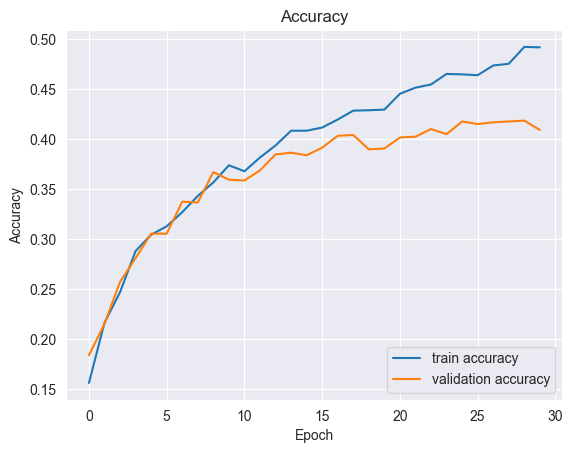

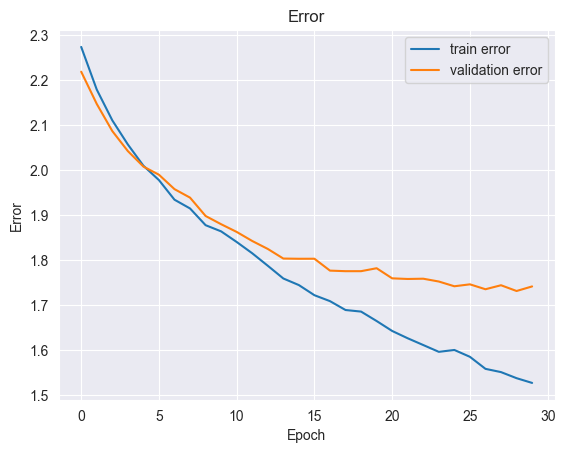

In [5]:
model_wrapper.plot_history(history)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Accuracy :  0.40893760539629004
[4 2 6 ... 8 7 1]
[4 9 5 ... 7 7 3]


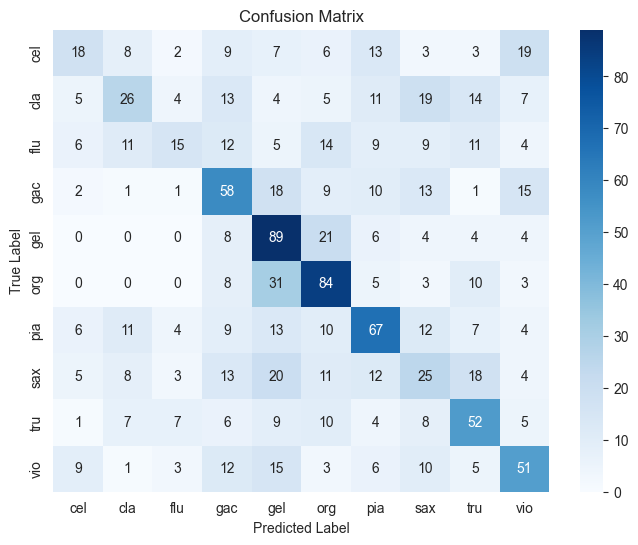

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [6]:
from keras.src.utils import to_categorical
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
y_pred = model_wrapper.model.predict(X_test)

y_pred_f = []
for y_val in y_pred:
    l = np.argmax(y_val)
    y_pred_f.append(l)
y_pred_f = np.array(y_pred_f)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_f)
print("Accuracy : ", accuracy)
print(y_test)
print(y_pred_f)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_f)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))